In [129]:
## ANVÄNDS EJ LÄNGRE

## NLTK SET UP ##

## Natural language processing, pandas setup

#Import tokenization, download stopwords & punkt. Download not needed each run but left in for compatibility.
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import download 
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')


## Feed variable with NLTK stopwords
stop_words = set(stopwords.words("swedish"))




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bohmaniac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/bohmaniac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bohmaniac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [130]:

## SET UP PANDAS & READ FILE ##
import pandas as pd
# read the file called 2022.json that is in the same directory and call it jobtech_dataset
jobtech_dataset = pd.read_csv('jobtech_dataset2022.csv')
#pd.set_option('max_colwidth', None) # Tell editor to not limit column width


df = jobtech_dataset[['id', 'description', 'working_hours_type', 'must_have', 'nice_to_have']]  # Picking our columns



In [131]:
#Choosing data & tokenizes it

#min_variabel = df.iloc[0:100]['description']            # Taking the second row from the data and only 'description' column
min_variabel = df['description']
# Prints the entire description of a certain row for debug purposes
print(min_variabel)

# Tokenizes by word, each word becomes an entry in an array. Feed them into another variable. We need to fix our variable names.
variabel = word_tokenize(str(min_variabel))


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [132]:
## STOPWORDS & PUNCTUATION## + BLACKLIST



#For each word in our variable, remove those that are stopwords
filtrerad_lista = []
for word in variabel:
    if word.casefold() not in stop_words:
        filtrerad_lista.append(word)


# Ta bort punkter och sånt
blacklist = ["'", ".", ":", "!", "*", "None", ","]
ny_filtrerad_lista = []
for word in filtrerad_lista:
    if word not in blacklist:
        ny_filtrerad_lista.append(word)




#Prints our list of remaining, non-stop words

print(ny_filtrerad_lista)





['0', '{', "'text", '``', 'We', 'are', 'looking', 'for', 'you', 'who', 'want', 'to', 'go', 'in', 'and', 'be', 'involved', 'in', 'the', 'business', 'with', 'one', 'of', 'our', 'large', 'customers', 'in', 'electronics', 'Mycronic', 'operates', 'in', 'the', 'electronics', 'industry', 'and', 'has', 'for', 'several', 'years', 'in', 'a', 'row', 'been', 'named', 'one', 'of', 'the', 'companies', 'that', 'offer', 'unique', 'career', 'and', 'development', 'opportunities', 'via', 'Karriärföretagen', 'With', 'them', 'you', 'are', 'challenged', 'every', 'day', '-', 'do', 'you', 'want', 'to', 'be', 'a', 'part', 'of', 'their', 'continued', 'journey', '?', 'Welcome', 'with', 'your', 'application', '\\n\\nOM', 'TJÄNSTEN\\nMycronic', 'is', 'looking', 'for', 'a', 'Service', 'Engineer', 'for', 'employment', 'based', 'at', 'the', 'headquarters', 'in', 'Stockholm/Täby', 'Your', 'challenge', 'will', 'be', 'to', 'work', 'with', 'advanced', 'inhouse', 'process', 'and', 'metrology', 'equipment', 'in', 'their', 

In [133]:
##STEMMING 
##Reducerar ord som helper och helping till help
#Kommentar: Funkar inte görbra på svenska - precis som Vasili sa

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer


stemmer = LancasterStemmer()

stemmed_lista = [stemmer.stem(word) for word in ny_filtrerad_lista]

print(stemmed_lista)

['0', '{', "'text", '``', 'we', 'ar', 'look', 'for', 'you', 'who', 'want', 'to', 'go', 'in', 'and', 'be', 'involv', 'in', 'the', 'busy', 'with', 'on', 'of', 'our', 'larg', 'custom', 'in', 'electron', 'mycron', 'op', 'in', 'the', 'electron', 'industry', 'and', 'has', 'for', 'sev', 'year', 'in', 'a', 'row', 'been', 'nam', 'on', 'of', 'the', 'company', 'that', 'off', 'un', 'car', 'and', 'develop', 'opportun', 'via', 'karriärföret', 'with', 'them', 'you', 'ar', 'challeng', 'every', 'day', '-', 'do', 'you', 'want', 'to', 'be', 'a', 'part', 'of', 'their', 'continu', 'journey', '?', 'welcom', 'with', 'yo', 'apply', '\\n\\nom', 'tjänsten\\nmycronic', 'is', 'look', 'for', 'a', 'serv', 'engin', 'for', 'employ', 'bas', 'at', 'the', 'headquart', 'in', 'stockholm/täby', 'yo', 'challeng', 'wil', 'be', 'to', 'work', 'with', 'adv', 'inh', 'process', 'and', 'metrolog', 'equip', 'in', 'their', 'pmc', 'lab', 'en', 'the', 'develop', 'and', 'delivery', 'of', 'world', '’', 's', 'most', 'adv', 'las', 'patter

In [134]:
## Lemm (konverterar de stemmade orden till ord som betyder något)

from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

ny_lista = []
for word in stemmed_lista: 
    ny_lista.append(lemmatizer.lemmatize(word))

print(ny_lista)




['0', '{', "'text", '``', 'we', 'ar', 'look', 'for', 'you', 'who', 'want', 'to', 'go', 'in', 'and', 'be', 'involv', 'in', 'the', 'busy', 'with', 'on', 'of', 'our', 'larg', 'custom', 'in', 'electron', 'mycron', 'op', 'in', 'the', 'electron', 'industry', 'and', 'ha', 'for', 'sev', 'year', 'in', 'a', 'row', 'been', 'nam', 'on', 'of', 'the', 'company', 'that', 'off', 'un', 'car', 'and', 'develop', 'opportun', 'via', 'karriärföret', 'with', 'them', 'you', 'ar', 'challeng', 'every', 'day', '-', 'do', 'you', 'want', 'to', 'be', 'a', 'part', 'of', 'their', 'continu', 'journey', '?', 'welcom', 'with', 'yo', 'apply', '\\n\\nom', 'tjänsten\\nmycronic', 'is', 'look', 'for', 'a', 'serv', 'engin', 'for', 'employ', 'ba', 'at', 'the', 'headquart', 'in', 'stockholm/täby', 'yo', 'challeng', 'wil', 'be', 'to', 'work', 'with', 'adv', 'inh', 'process', 'and', 'metrolog', 'equip', 'in', 'their', 'pmc', 'lab', 'en', 'the', 'develop', 'and', 'delivery', 'of', 'world', '’', 's', 'most', 'adv', 'la', 'pattern',

In [135]:
# Magin
#nltk.download("book")
from nltk import FreqDist

frequency_distribution = FreqDist(ny_lista)

print(frequency_distribution)
ny_variabel = frequency_distribution.most_common(50)

print(ny_variabel)

ny_variabel = frequency_distribution.most_common(20)
print("\nTop 50 most common words:")
for word, freq in ny_variabel:
    print(f"{word}: {freq}")





<FreqDist with 1340 samples and 2732 outcomes>
[('and', 31), ('in', 29), ('arbet', 26), ('kom', 22), ('the', 20), ('work', 19), ('person', 19), ('god', 17), ('samt', 17), ('you', 15), ('to', 15), ('a', 15), ('söker', 14), ('nya', 14), ('tjänsten', 14), ('?', 13), ('academ', 13), ('with', 12), ('rol', 12), ('ta', 12), ('mycron', 11), ('kund', 11), ('kunskap', 11), ('genom', 11), ('{', 10), ("'text", 10), ("'text_formatted", 10), ("'company_information", 10), ("'needs", 10), ("'requirements", 10), ("'conditions", 10), ('}', 10), ('vil', 10), ('utveckl', 10), ('(', 10), (')', 10), ('kontakt', 10), ('jobb', 10), ('of', 9), ('serv', 9), ('erfarenhet', 9), ('van', 9), ('be', 8), ('-', 8), ('process', 8), ('ab', 8), ('–', 8), ('ansök', 8), ('is', 7), ('an', 7)]

Top 50 most common words:
and: 31
in: 29
arbet: 26
kom: 22
the: 20
work: 19
person: 19
god: 17
samt: 17
you: 15
to: 15
a: 15
söker: 14
nya: 14
tjänsten: 14
?: 13
academ: 13
with: 12
rol: 12
ta: 12


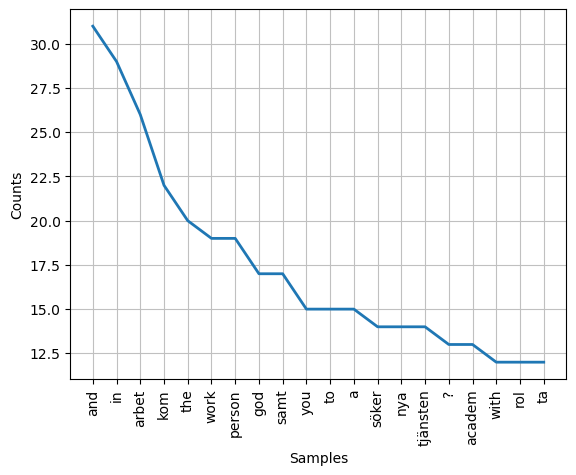

<Axes: xlabel='Samples', ylabel='Counts'>

In [136]:
## PLOT

frequency_distribution.plot(20, cumulative=False)